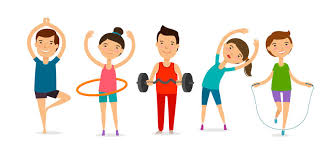

### Do you know?
1) Music improves workout performance,
2) Exercising improves brain performance.
3) Working out sharpens your memory.

##  Introduction

### About the Dataset


<b> This is data that confirmed the grade of performance with age and some exercise performance data.
    
Content:
    
data shape : (13393, 12))
    
age : 20 ~64
    
gender : F,M
    
height_cm : (If you want to convert to feet, divide by 30.48)
    
weight_kg
    
body fat_%
    
gripForce
    
sit-ups counts
    
broad jump_cm
    
class : A,B,C,D ( A: best) / stratified
    

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [2]:
data=pd.read_csv('./bodyPerformance.csv')
data.head(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


In [3]:
data.columns=data.columns.str.replace(' ','')

In [4]:
data.describe()

,age,height_cm,weight_kg,bodyfat_%,diastolic,systolic,gripForce,sitandbendforward_cm,sit-upscounts,broadjump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   13393 non-null  float64
 1   gender                13393 non-null  object 
 2   height_cm             13393 non-null  float64
 3   weight_kg             13393 non-null  float64
 4   bodyfat_%             13393 non-null  float64
 5   diastolic             13393 non-null  float64
 6   systolic              13393 non-null  float64
 7   gripForce             13393 non-null  float64
 8   sitandbendforward_cm  13393 non-null  float64
 9   sit-upscounts         13393 non-null  float64
 10  broadjump_cm          13393 non-null  float64
 11  class                 13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [6]:
data.shape

(13393, 12)

In [7]:
data.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'bodyfat_%', 'diastolic',
       'systolic', 'gripForce', 'sitandbendforward_cm', 'sit-upscounts',
       'broadjump_cm', 'class'],
      dtype='object')

### Renaming the data

In [8]:
data.rename(columns={'height_cm':'Heightcm','weight_kg':'Weightkg','bodyfat_%':'Bodyfat','sitandbendforward_cm':'SitandbendforwardCM','sit-upscounts':'Situpcounts','broadjump_cm':'Broadjump'},inplace=True)
data.head()

,age,gender,Heightcm,Weightkg,Bodyfat,diastolic,systolic,gripForce,SitandbendforwardCM,Situpcounts,Broadjump,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [9]:
data=data[['age','gender','Heightcm','Weightkg','Bodyfat','diastolic','systolic','gripForce','SitandbendforwardCM','Situpcounts','Broadjump','class']]

In [10]:
data.isnull().sum()

age                    0
gender                 0
Heightcm               0
Weightkg               0
Bodyfat                0
diastolic              0
systolic               0
gripForce              0
SitandbendforwardCM    0
Situpcounts            0
Broadjump              0
class                  0
dtype: int64

In [11]:
data.isnull().mean()*100

age                    0.0
gender                 0.0
Heightcm               0.0
Weightkg               0.0
Bodyfat                0.0
diastolic              0.0
systolic               0.0
gripForce              0.0
SitandbendforwardCM    0.0
Situpcounts            0.0
Broadjump              0.0
class                  0.0
dtype: float64

In [12]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13388    False
13389    False
13390    False
13391    False
13392    False
Length: 13393, dtype: bool

In [13]:
column=['age','Heightcm','Weightkg','Bodyfat','diastolic','systolic','gripForce','SitandbendforwardCM','Situpcounts','Broadjump']

## Univariate Analysis

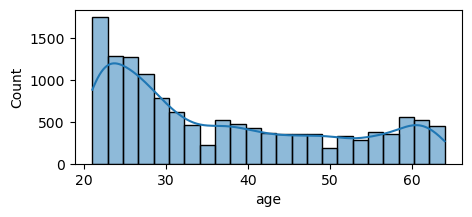

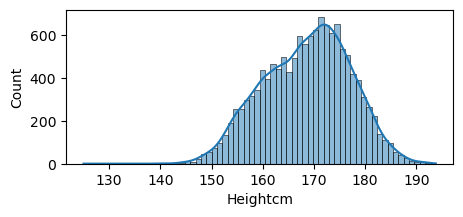

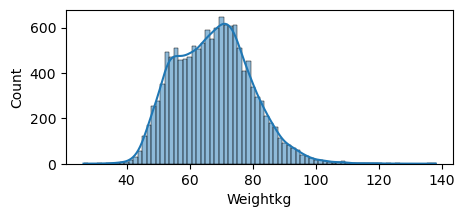

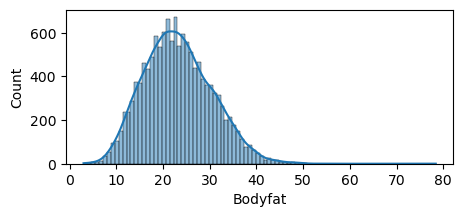

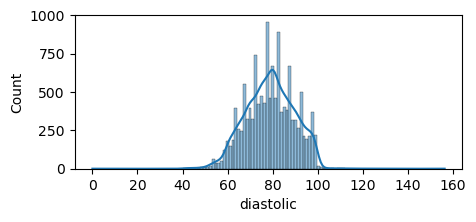

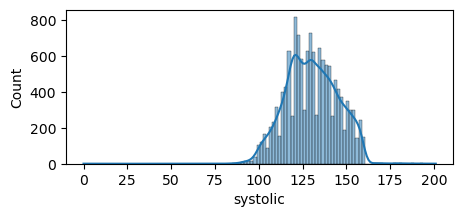

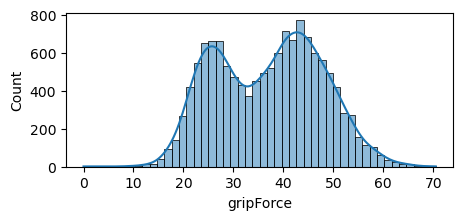

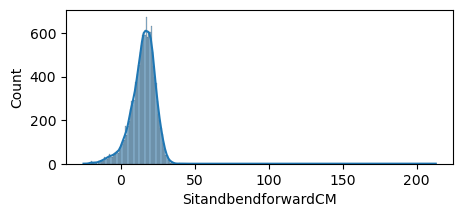

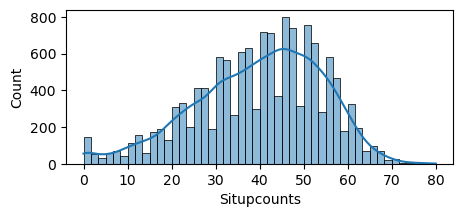

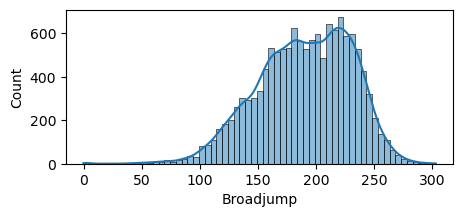

In [14]:
for i in column:
    plt.figure(figsize=(5,2))
    sns.histplot(data=data[i],kde=True)
    plt.show()

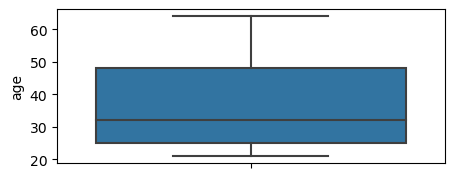

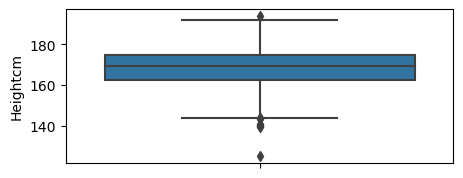

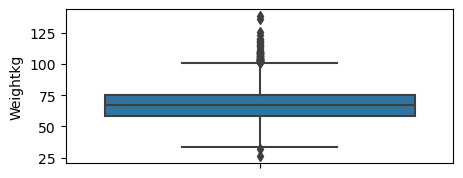

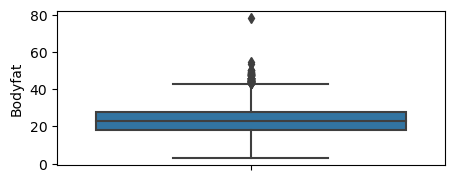

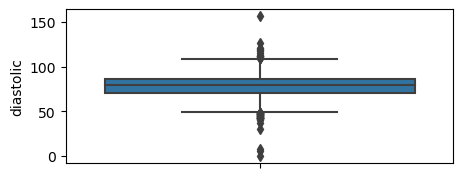

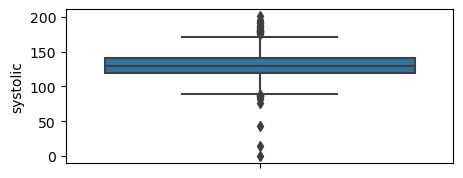

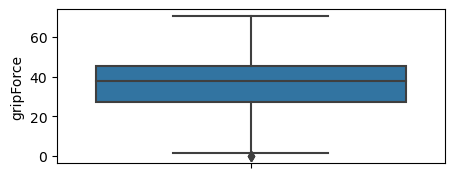

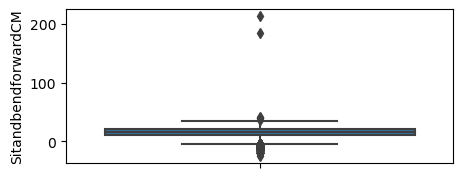

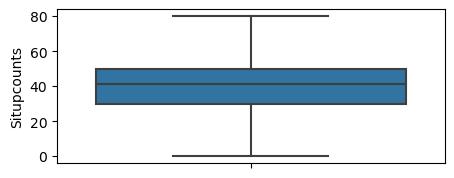

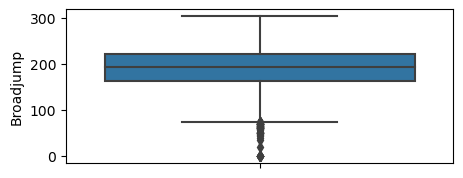

## Outlayer Treatment

In [16]:
def Outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR= Q3-Q1
    UL= Q3+1.5*IQR
    LL= Q1-1.5*IQR
    return UL,LL

In [17]:
UL, LL = Outlier_limit(data['Bodyfat'])
data['Bodyfat'] = np.where((data['Bodyfat']>UL) | (data['Bodyfat']<LL),np.nan,data['Bodyfat'])

In [18]:
data.isnull().sum()

age                     0
gender                  0
Heightcm                0
Weightkg                0
Bodyfat                77
diastolic               0
systolic                0
gripForce               0
SitandbendforwardCM     0
Situpcounts             0
Broadjump               0
class                   0
dtype: int64

<b>We can see that there is 3 outliers present in the DataFrame. We have to drop it.¶

## Box Plot

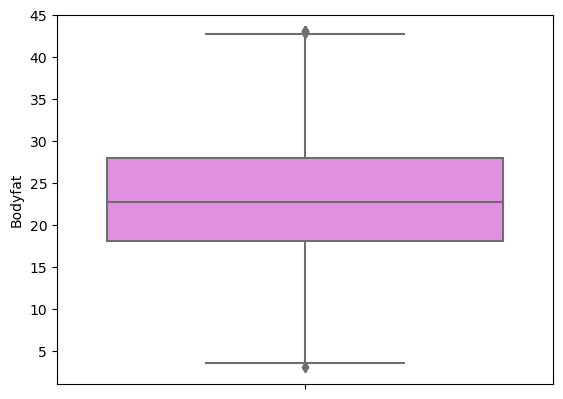

In [19]:
sns.boxplot(data=data, y='Bodyfat',color='violet');

In [20]:
data.dropna(inplace=True)
data.head(10)

,age,gender,Heightcm,Weightkg,Bodyfat,diastolic,systolic,gripForce,SitandbendforwardCM,Situpcounts,Broadjump,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


## Count Plot

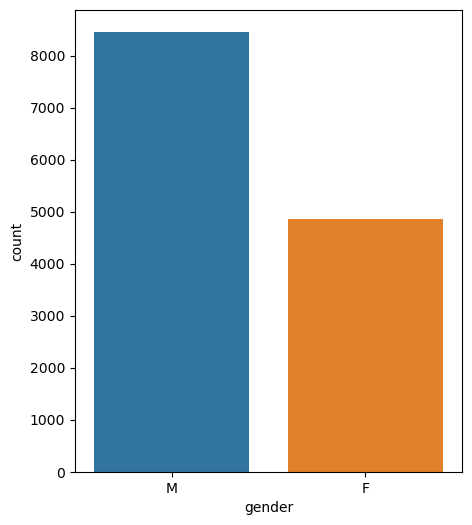

In [21]:
plt.figure(figsize=(5,6))
sns.countplot(data=data,x=data.gender)
plt.show()

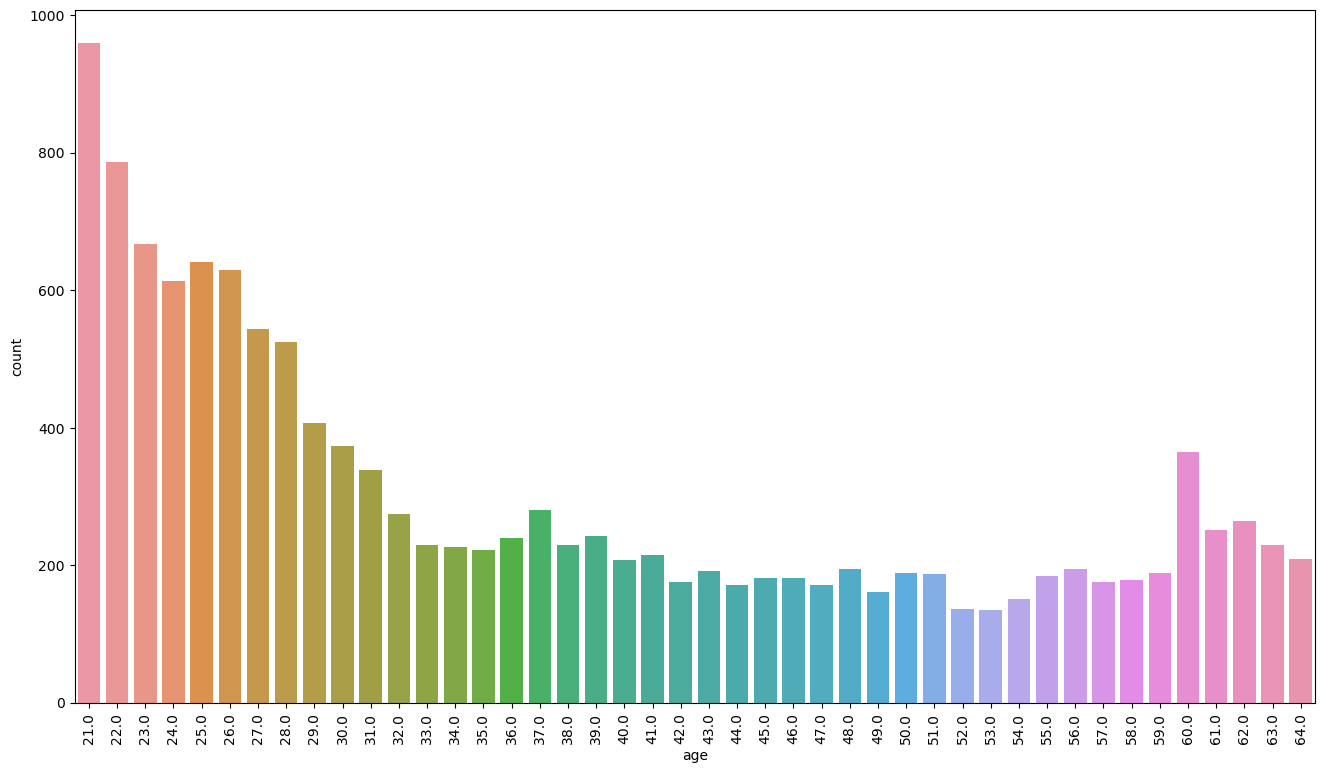

In [22]:
plt.figure(figsize=(16,9))
plt.xticks(rotation = 90)
sns.countplot(data=data,x='age')
plt.show()

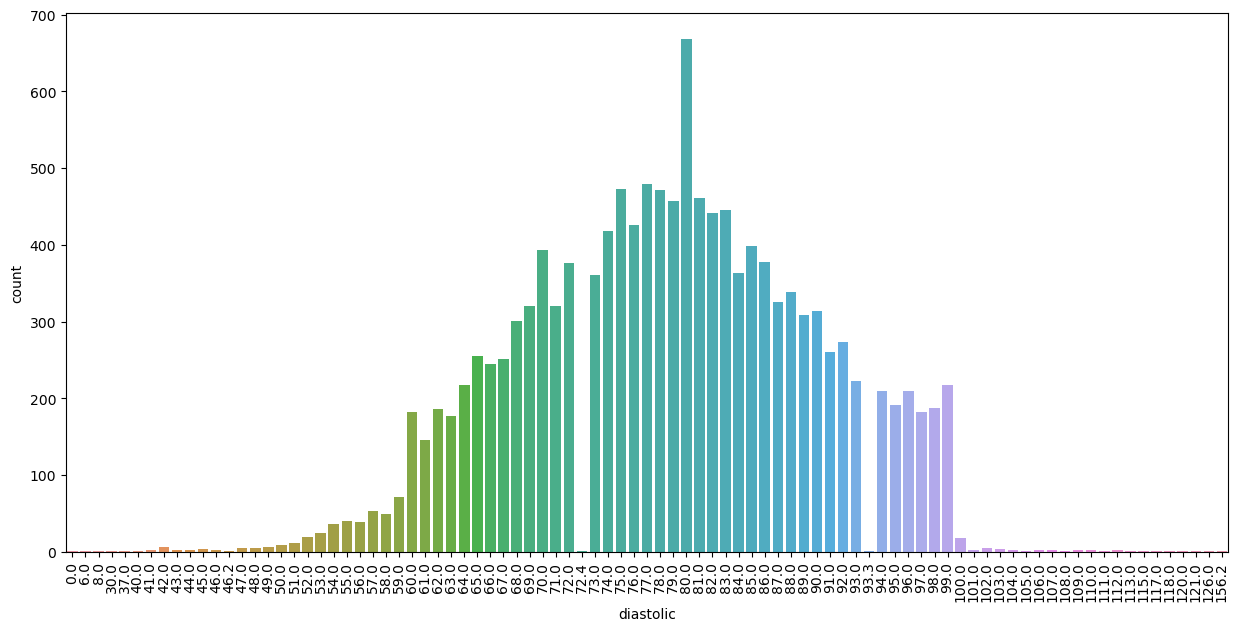

In [23]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 90)
sns.countplot(data=data,x='diastolic')
plt.show()

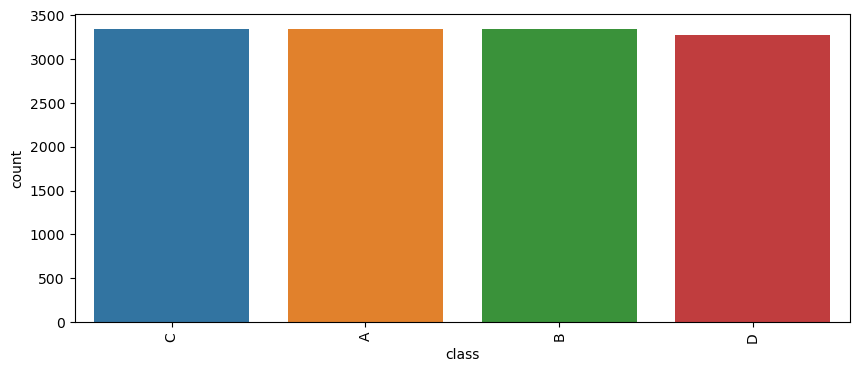

In [24]:
plt.figure(figsize=(10,4))
plt.xticks(rotation = 90)
sns.countplot(data=data,x='class')
plt.show()

## Line Plot

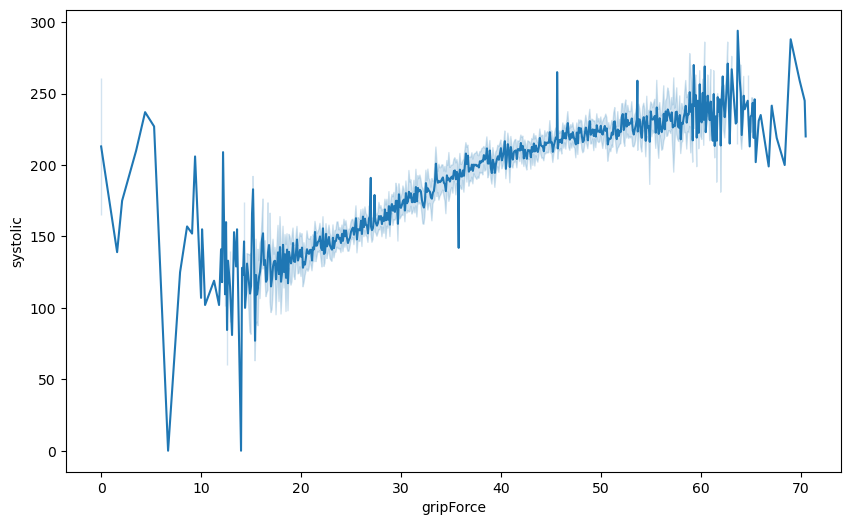

In [25]:
plt.figure(figsize=(10,6))
plt.xlabel('gripForce')

plt.ylabel('systolic')
sns.lineplot(data=data,x='gripForce', y='Broadjump')
plt.show()

## Boxen Plot

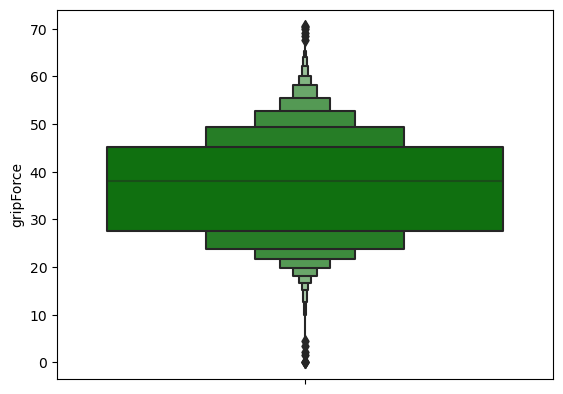

In [26]:
sns.boxenplot(data=data,y='gripForce',color='green')
plt.show()

## Swarm Plot

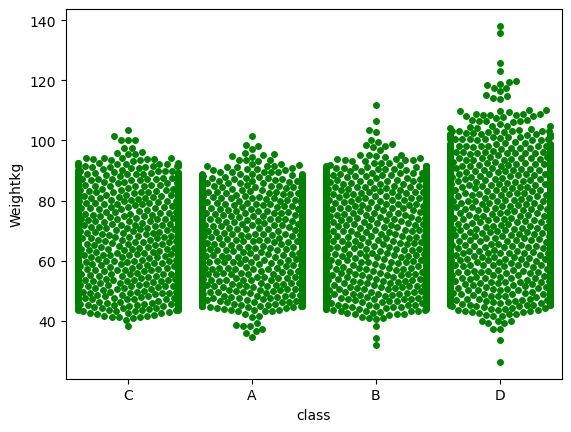

In [27]:
sns.swarmplot(data=data,x='class',y='Weightkg',color='green')
plt.show()

## Rel Plot

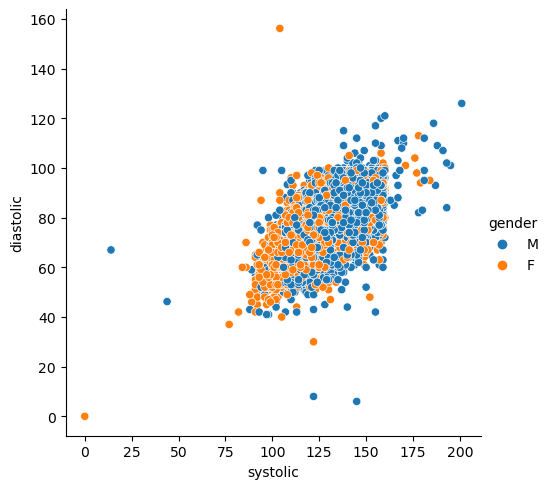

In [28]:
sns.relplot(data=data,x='systolic',y='diastolic',hue='gender')
plt.show()

## Hex Plot

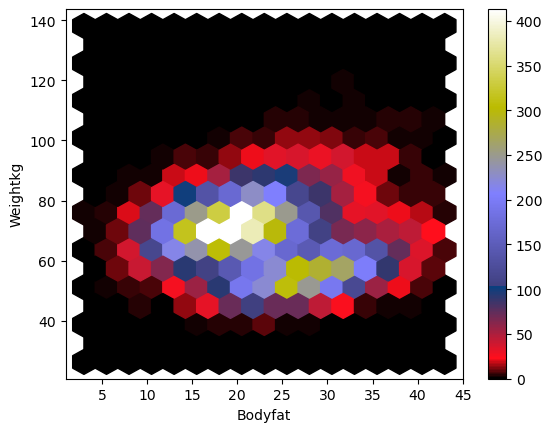

In [29]:
data.plot.hexbin('Bodyfat','Weightkg',gridsize=16,cmap='gist_stern');

In [30]:
Age_Bodyfat_weight=data.groupby(['Weightkg'])['Bodyfat'].sum()
Age_Bodyfat_weight

Weightkg
26.30     37.0
31.90     31.9
33.70     16.1
34.40     39.2
34.50     34.5
          ... 
119.80    41.7
123.00    42.7
125.70    35.2
135.78    35.2
138.10    30.3
Name: Bodyfat, Length: 1390, dtype: float64

## Heat Map

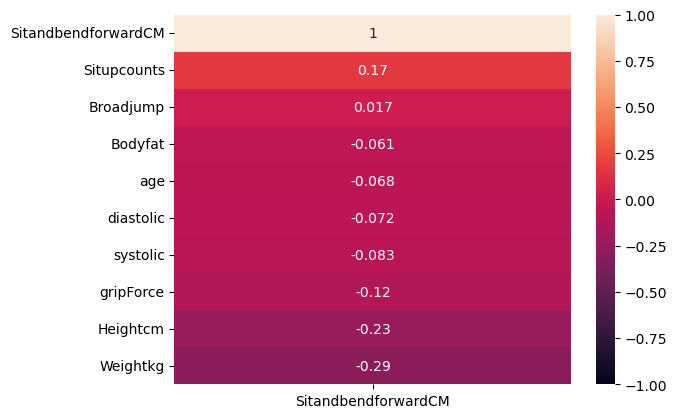

In [31]:
sns.heatmap(data.corr()[['SitandbendforwardCM']].sort_values(by='SitandbendforwardCM',ascending=False),vmax=1,vmin=-1,annot=True);

In [32]:
data.columns

Index(['age', 'gender', 'Heightcm', 'Weightkg', 'Bodyfat', 'diastolic',
       'systolic', 'gripForce', 'SitandbendforwardCM', 'Situpcounts',
       'Broadjump', 'class'],
      dtype='object')

In [33]:
to_drop=[ 'Heightcm', 'Weightkg', 'Bodyfat','gender']

In [34]:
data2=data.drop(columns= to_drop)
data2.head()        

,age,diastolic,systolic,gripForce,SitandbendforwardCM,Situpcounts,Broadjump,class
0,27.0,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,70.0,127.0,43.5,27.1,45.0,217.0,B


## Scatter Plot

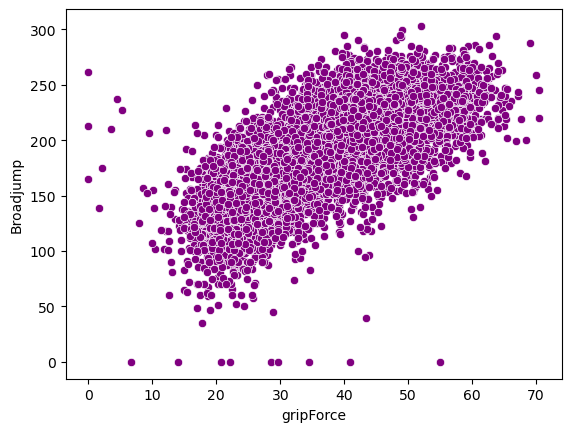

In [35]:
sns.scatterplot(x='gripForce',y='Broadjump',data=data,color='purple')
plt.show()

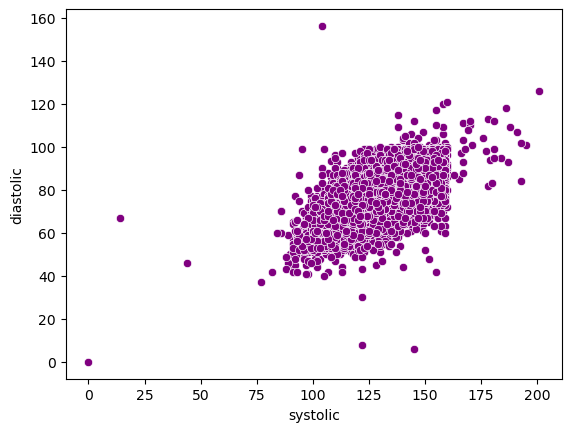

In [36]:
sns.scatterplot(x='systolic',y='diastolic',data=data,color='purple')
plt.show()

## Selecting Features and Targets

In [37]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

<b>Feature Scaling

<b> Initiating standard scalar

In [38]:
sc = StandardScaler()

In [39]:
x = sc.fit_transform(x)

ValueError: could not convert string to float: 'M'

<B> Splitting the data into training and testing sets

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

## Model Buildig